前面介绍了对一个总体的均值和比例如何进行区间估计以及假设检验，

本章说明如何对两个总体进行区间估计和假设检验。

# 两总体均值之差的推断：$\sigma_1$和$\sigma_2$已知

令 $\mu_1$ 和 $\mu_2$ 分别表示总体1和总体2的均值，本节介绍两均值之差：$\mu_1 - \mu_2$ 的统计推断。

独立简单随机样本：从总体1中抽取一个容量为 $n_1$ 的简单随机样本，从总体2中抽取一个容量为 $n_2$ 的简单随机样本 两个样本是相互独立抽取的。

假设两个总体的标准差 $\sigma_1$ 和 $\sigma_2$ 是已知的，如何计算误差范围以及计算两总体均值之间的区间估计？

## $\mu_1 - \mu_2$ 的区间估计

两个总体均值之差的点估计量 $\bar x_1 - \bar x_2$

$\bar x_1- \bar x_2$ 的标准误差:

$$\sigma_{\bar x_1 - \bar x_2} = \sqrt {\frac {\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}$$

两总体均值之差的区间估计：$\sigma_1$和$\sigma_2$已知

$$\bar x_1 - \bar x_2 \pm z_{\alpha/2}\sqrt{\frac {\sigma_1^2}{n_1}+ \frac {\sigma_2^2}{n_2}}$$

假设我们现在打算调查市区商场和郊区商场顾客的年龄差异，已知：

市区商场数据如下：
- $n_1 = 36$
- $\bar{x_1} = 40$
- $\sigma_1 = 9$

郊区商场数据如下：
- $n_2 = 49$
- $\bar{x_2} = 35$
- $\sigma_2 = 10$

置信区间 95% 下，显著性水平 $\alpha = 0.05$，$z_{\alpha/2} = z_{0.025} = 1.96$

$$\bar x_1 - \bar x_2 \pm z_{\alpha/2}\sqrt{\frac {\sigma_1^2}{n_1}+ \frac {\sigma_2^2}{n_2}}$$

$$40 - 35 \pm 1.96 \times \sqrt{\frac{9^2}{36}+ \frac{10^2}{49}}$$

$$5 \pm 4.06$$

此时误差边际为 4.06，总体均值之差的 95% 的置信区间估计为 5-4.06 = 0.94 岁到 5+4.06 = 9.06 岁。

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

from pathlib import Path
#设置数据文件夹路径
DATA = Path().resolve()  / 'data'

## $\mu_1 -\mu_2$ 的假设检验

假设检验的三种形式：上侧检验 下侧检验 双侧检验

实用建议：给出的区间估计与假设检验的大部分应用，随机样本都满足 $n_1\ge30$ 及 $n_2\ge30$。一旦其中之一的样本容量小于 30，总体的分布就需要重点加以考虑

作用：考察两总体样本之间的差异

$\mu_1 - \mu_2$ 的假设检验的检验统计量：$\sigma_1$ 和 $\sigma_2$ 已知

$$z = \frac{(\bar x_1 - \bar x_2)-D_0}{\sqrt {\frac {\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$

其中 $D_0$ 为两个总体的均值之差，零假设一般认为 $D_0 = 0$。

还使用上面的超市顾客的例子：

$$z = \frac{(\bar x_1 - \bar x_2)-D_0}{\sigma_{\bar x_1 - \bar x_2}}
= \frac{40 - 35}{2.07} = 2.42$$

设显著性水平 $\alpha = 0.05$，此时 $z_{\alpha/2} = z_{0.025} = 1.96 < 2.42$

因此我们可以拒绝零假设，认为两个总体的均值之差 $D_0 \neq 0$。

# t 检验
假设检验中，最为简单、常用的方法是 t 检验（t-test/student’s t-test），在这一小节中主要以案例的形式谈及各种t检验方法的用途、使用条件和注意事项。

前面我们讨论了如正态分布以及如何使用正态分布得到 $z$ 分数，并获得精准概率，但这个操作有两个前提：
- 总体标准差已知
- 大样本（ n > 120 ）

如果二者都不满足，我们不能利用正态分布进行推断统计。

但是，如果是针对小样本数据，我们可以使用 t 分布来进行推断统计。

而我们接下来学习的 t 检验，就是利用 t 分布的性质来进行推断统计的方法之一。

## 单样本 t 检验

实际上，我们之前使用 t 分布判断概率和置信区间的操作，就是单样本 t 检验。

单样本 t 检验，只需要有一个定量变量，就可以分析。

由于上一节我们没有使用 Python 演示单样本 t 检验的过程，现在我们在这里补上。

我们可以用`scipy`库里面的`stats.ttest_1samp`来进行单样本 t 检验

In [7]:
data = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]
df = pd.DataFrame(data)
tscore, pvalue = ttest_1samp(df, popmean=16)
print("t Statistic: ", tscore)
print("P Value: ", pvalue)
print("One-tail P Value: ", pvalue/2)

t Statistic:  [-4.2121177]
P Value:  [0.00145557]
One-tail P Value:  [0.00072778]


我们可以直接用函数得出计算结果，方便快捷又卫生，但实际上，函数是给熟练掌握了算法的同学直接使用的，作为初学者的我们，最好还是一步步算出计算结果。

我在这里给出 t 分数的计算公式，你能使用 pandas 最基本的函数，算出`t Statistic`的结果吗？

$$\displaystyle t = \frac{样本均值 - 总体均值}{标准误差} = \frac{样本均值 - 总体均值}{\frac{标准差}{\sqrt{样本数}}}$$

In [8]:
print((df.mean() - 16)/(df.std()/pow(df.count(),0.5)))

0   -4.212118
dtype: float64


我们可以看到，$p$ 值小于 0.05，只有 0.01，所以我们可以肯定，`Time`的均值是 1 的概率应该不太大。

实际上`Time`的均值是：

In [9]:
print(df.mean())

0    14.333333
dtype: float64


## 单变量和多变量

在此之前，无论是使用正态分布或 t 分布，我们都只是针对单一变量进行推断统计。

从现在开始，我们要增加难度了，现在我们需要对两组变量进行推断统计。

# 多变量 t 检验
## 独立样本 t 检验

两样本检验又称成组t检验（two sample/group t-test）

适用于完全随机设计两样本均数的比较（两组完全随机设计是将受试对象完全随机分配到两个不同处理组）

此时人们关心的是两**样本均值**所代表的两**总体均值**是否**不相等**。

适用的条件是：

- 两组样本之间无关，并且样本没有重叠（一个对象不能同时属于两个群组），因此这些群组是独立的
- 需要一个定类变量和一个定量变量
    - 定类变量一般为二值变量，如：男/女，是/否
    - 定量变量作为自变量
- 定量变量不存在显著的异常值
- 定量变量在各组内接近正态分布
- 两组定量变量的方差相等

例如我们的案例数据，有`pre`和`post`两组，独立样本 t 检验可以验证，不同组别的定量变量是否存在差异

当两样本含量较小（如 $n_1 ≤ 60$ 或/和 $n_2 ≤60$）且均来自正态总体时，根据两总体方差是否相等而采用不同检验方法。

In [10]:
d = {'pre': [14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12],
     'post': [15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13]}
df = pd.DataFrame(data=d)
print(df['pre'].mean() / df['post'].mean())

0.9588607594936709


NameError: name 'plt' is not defined

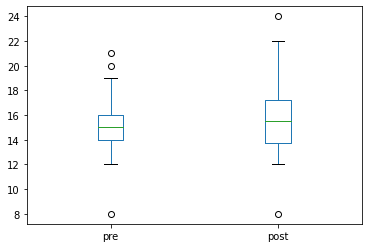

In [11]:
df.boxplot(grid=False)
plt.tight_layout()
plt.show()

我们可以看到，两组数据的分布基本相等，方差之比小于 4，样本容量也差不多，基本满足适用条件。

因此，我们就直接使用这组数据来进行独立样本 t 检验吧。

独立样本 t 检验的计算方式如下：

$$ t = \frac{样本均值的观测差异}{样本均值之差的标准误差} = \frac{\bar{X_1}-\bar{X_2}}{s_{\bar{X_1}-\bar{X_2}}}$$

其中
- $\bar{X_1}$：样本 1 的均值
- $\bar{X_2}$：样本 2 的均值
- $s_{\bar{X_1}-\bar{X_2}}$：均值之差的标准误差

假设样本容量大致相等，则 $s_{\bar{X_1}-\bar{X_2}} = \sqrt{s_\bar{X_1}^2 + s_\bar{X_2}^2} $
- $s_\bar{X_1}$：第一个样本均值的标准误差
- $s_\bar{X_2}$：第二个样本均值的标准误差

In [12]:
ttest_ind(df['pre'],df['post'])

Ttest_indResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257)

## 配对样本 t 检验

配对样本 t 检验
1. 观察变量为连续变量。
2. 观察变量为配对设计。（和独立样本 t 检验的区别在于此）
3. 观察变量可分为2组。
4. 观察变量不存在显著的异常值。
5. 两个配对组别间观察变量的差值服从正态(或近似正态)分布。

In [14]:
d = {'pre': [88, 82, 84, 93, 75, 78, 84, 87, 95, 91, 83, 89, 77, 68, 91],
     'post': [91, 84, 88, 90, 79, 80, 88, 90, 90, 96, 88, 89, 81, 74, 92]}
df = pd.DataFrame(data=d)
ttest_rel(df['pre'], df['post'])

Ttest_relResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272)

# 两总体均值之差的推断：$\sigma_1$和$\sigma_2$未知

对两总体标准差$\sigma_1$和$\sigma_2$未知的情形， 将使用样本标准差$s_1$和$s_2$来估计未知的总体标准差  

使用样本标准差时，区间估计与假设检验的程序将会建立在 $t$ 分布的基础上而非标准正态分布


两个总体均值之差的区间估计：$\sigma_1$和$\sigma_2$未知：$\bar x_1 - \bar x_2 \pm t_{\alpha/2}\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$

用样本标准差 $s_1$ 和 $s_2$ 来估计 $\sigma_1$ 和 $\sigma_2$

并用 $t_{\alpha/2}$ 来代替 $z_{\alpha/2}$

$t$分布

自由度：两个独立随机样本的$t$分布：

$ df = \frac {(\frac {s_1^2}{n_1}+ \frac {s_2^2}{n_2})^2}{\frac {1}{n_1-1}(\frac{s_1^2}{n_1})^2+ \frac {1}{n_2-1}(\frac{s_2^2}{n_2})^2}$

$\mu_1 - \mu_2$ 的假设检验

# 独立样本 $t$ 检验：$\mu_1 - \mu_2$ 的假设检验的检验统计量：$\sigma_1$ 和$\sigma_2$ 未知

$ t = \frac{(\bar x_1 - \bar x_2)-D_0}{\sqrt {\frac {s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

In [76]:
twins = pd.read_csv(DATA / 'Twins.csv')
twins.head()

data1 = twins['SAT Score No Siblings'].dropna()
data2 = twins['SAT Score With Siblings'].dropna()

print('data1: n=%d mean=%.3f stdv=%.3f' % (data1.count(), data1.mean(), data1.std()))
print('data2: n=%d mean=%.3f stdv=%.3f' % (data2.count(), data2.mean(), data2.std()))

data1: n=20 mean=547.500 stdv=82.454
data2: n=20 mean=533.500 stdv=80.084


In [77]:
# Student's t-test
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=0.545, p=0.589
Same distributions (fail to reject H0)


In [73]:
homePrices = pd.read_csv(DATA / 'HomePrices.csv')
data1 = homePrices['2006'].dropna()
data2 = homePrices['2009'].dropna()
print('data1: n=%d mean=%.3f stdv=%.3f' % (data1.count(), data1.mean(), data1.std()))
print('data2: n=%d mean=%.3f stdv=%.3f' % (data2.count(), data2.mean(), data2.std()))

data1: n=30 mean=225896.667 stdv=55207.361
data2: n=40 mean=170992.500 stdv=44958.256


In [1]:
# Student's t-test with unequal variance
stat, p = ttest_ind(data1, data2, equal_var = False)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

NameError: name 'ttest_ind' is not defined

# 配对样本 $t$ 检验：两总体均值之差的推断：匹配样本

在选择用于搜集生产时间数据及检验假设的抽样方法时，考虑两种方案

1. 独立样本设计：例子 抽取工人的一个简单随机样本 样本中每个工人使用生产方法1；抽取工人的另一个独立的简单随机样本 样本中每个工人使用生成方法2

2. 匹配样本设计：抽取工人的简单随机样本 每个工人先用一种生产方法，然后使用另一种生产方法 

在匹配样本设计中，两种生产方法在相似条件下被检验 因此这一设计产生的抽样误差往往要比独立样本设计要小  主要因为在匹配样本设计中 两种生产方法被相同的工人使用 剔除了工人间的差异

匹配样本的样本均值 $\bar d = \frac {\sum d_i}{n} $  $d_i$为方法1和方法2之差

匹配样本的标准差  $ s_d = \sqrt {\frac {\sum(d_i - \bar d)^2}{n-1}}$

匹配样本假设检验的检验统计量：$ t = \frac{\bar d - u_d}{s_d/\sqrt n}$

In [99]:
matched = pd.read_csv(DATA / 'Matched.csv')

data1 = matched['Method 1'].dropna()
data2 = matched['Method 2'].dropna()
print('data1: n=%d mean=%.3f stdv=%.3f' % (data1.count(), data1.mean(), data1.std()))
print('data2: n=%d mean=%.3f stdv=%.3f' % (data2.count(), data2.mean(), data2.std()))

data1: n=6 mean=6.100 stdv=0.654
data2: n=6 mean=5.800 stdv=0.460


In [100]:
# 独立样本 t 检验
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=0.919, p=0.380
Same distributions (fail to reject H0)


In [101]:
# 配对样本 t 检验
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2.196, p=0.080
Same distributions (fail to reject H0)


In [102]:
softwareTest = pd.read_csv(DATA / 'SoftwareTest.csv')
data1 = softwareTest['Current'].dropna()
data2 = softwareTest['New'].dropna()
print('data1: n=%d mean=%.3f stdv=%.3f' % (data1.count(), data1.mean(), data1.std()))
print('data2: n=%d mean=%.3f stdv=%.3f' % (data2.count(), data2.mean(), data2.std()))

data1: n=12 mean=325.000 stdv=39.995
data2: n=12 mean=286.000 stdv=43.998


In [103]:
# compare samples
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2.451, p=0.032
Different distributions (reject H0)


# （没有找到好的解决方案）两总体比例之差的推断

令$p_1$表示总体$1$的比例，$p_2$表示总体$2$的比例，讨论两总体比例之差$p_1 - p_2$的统计推断

为了对这个比例之差做出推断 选择两个独立的随机样本，这两个样本分别总体$1$的$n_1$个单位和总体$2$中$n_2$个单位组成

两总体比例之差的点估计量：$\bar p_1 - \bar p_2$

$\bar p_1 - \bar p_2$的标准误差：$\sigma_{\bar p_1 - \bar p_2} = \sqrt{\frac {p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$

如果样本容量足够大 使得$n_1p_1$, $n1(1-p_1)$，$n_2p_2$,$n_2(1-p_2)$都大于或等于5，则$\bar p_1 - \bar p_2$的抽样分布近似服从于正态分布

两总体比例之差的区间估计：$\bar p_1 - \bar p_2 \pm z_{\alpha/2}\sqrt{\frac {\bar p_1(1-\bar p_1)}{n_1}+\frac{\bar p_2(1-\bar p_2)}{n_2}}$

## $p_1 - p_2$的假设检验

当$p_1=p_2=p$时， $\bar p_1 - \bar p_2$的标准误差 ：$\sigma_{\bar p_1 - \bar p_2} = \sqrt{\frac {p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}} = \sqrt{p(1-p)(\frac{1}{n_1}+\frac{1}{n_2}})$

当$p_1=p_2=p$时，$p$的合并估计量：$\bar p =\frac{ n_1\bar p_1 + n_2\bar p_2 }{n_1 + n_2}$

$p_1-p_2$的假设检验的检验统计量：$ z = \frac{\bar p_1 - \bar p_2}{\sqrt{p(1-p)(\frac{1}{n_1}+\frac{1}{n_2}})}$

In [125]:
taxPrep = pd.read_csv(DATA / 'TaxPrep.csv')
data1 = taxPrep['Office 1'].dropna()
data2 = taxPrep['Office 2'].dropna()

,Office 1,Office 2
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
295,NaN,No
296,NaN,No
297,NaN,Yes
298,NaN,No


In [123]:
data1.value_counts()

No     215
Yes     35
Name: Office 1, dtype: int64

In [124]:
data2.value_counts()

No     273
Yes     27
Name: Office 2, dtype: int64